***Importing Data***

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [2]:
df_stocks = pd.read_pickle('Pickled ten year data.pkl')

In [3]:
df_stocks

,close,adj close,articles
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


In [4]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [5]:
df_stocks = df_stocks[['prices','articles']]

In [6]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_stocks

,prices,articles
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


In [8]:
df = df_stocks[['prices']].copy()
df

,prices
2007-01-01,12469
2007-01-02,12472
2007-01-03,12474
2007-01-04,12480
2007-01-05,12398
2007-01-06,12406
2007-01-07,12414
2007-01-08,12423
2007-01-09,12416
2007-01-10,12442


***Adding sentiment columns***

In [9]:
# Adding new columns to the data frame# Adding  
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [10]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()

for date,row in df_stocks.T.iteritems():#to transpose the rows and perform iterations
    try:
        sentence = unicodedata.normalize('NFKD', df_stocks.loc[date, 'articles']) #NFKD for the unicode 
        ss = sid.polarity_scores(sentence)
        df.set_value(date, 'compound', ss['compound'])
        df.set_value(date, 'neg', ss['neg'])
        df.set_value(date, 'neu', ss['neu'])
        df.set_value(date, 'pos', ss['pos'])
    except TypeError:
        print(df_stocks.loc[date, 'articles'])
        print(date)

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [12]:
df

,prices,compound,neg,neu,pos
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8179,0.114,0.787,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9975,0.193,0.739,0.069
2007-01-08,12423,-0.9601,0.11,0.793,0.097
2007-01-09,12416,-0.9953,0.103,0.848,0.049
2007-01-10,12442,-0.9534,0.134,0.743,0.123


In [13]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.ix[train_start_date : train_end_date]
test = df.ix[test_start_date:test_end_date]

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [14]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [15]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)
numpy_df_test

array([[0.138, 0.122],
       [0.149, 0.093],
       [0.131, 0.083],
       ...,
       [0.138, 0.097],
       [0.168, 0.098],
       [0.173, 0.161]])

In [16]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [17]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train,y_train)

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
print(rf.feature_importances_)

[0.52724401 0.47275599]


In [19]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [20]:
prediction

array([12713.44      , 11718.19666667, 11209.        , 14492.7       ,
       13138.75      , 15767.6       , 12082.9       , 13754.9       ,
       13955.65      , 12078.5       , 12634.5       , 11278.7       ,
       12942.5       , 11969.36666667, 13216.1       , 11581.5       ,
       15068.4       , 11323.        , 13278.5       , 11503.        ,
       11963.        , 11307.1       , 14364.2       , 11212.8       ,
       13147.65      , 12435.6       , 10530.9       , 12536.21      ,
        8986.1       , 13376.76      , 13930.35      , 12128.1       ,
       12095.6       , 11655.305     , 11504.25      , 14589.2       ,
       12823.94452381, 11965.5       , 12221.        , 11847.18333333,
       11564.8       , 11231.35      , 11580.5       , 11283.        ,
       12763.6       , 14349.5       ,  9957.54      , 14994.3       ,
       16191.96666667, 14292.36333333, 16008.2       , 12836.7       ,
       13844.1       , 13128.9       , 11753.85      ,  9645.8       ,
      

In [21]:
contributions

array([[  638.34272468,  -514.52705733],
       [ -676.22125726,  -195.20640872],
       [-1003.7691166 ,  -376.85521605],
       ...,
       [  195.29596559,   216.0130351 ],
       [ 1284.98001086,    36.07565649],
       [ -897.3437911 ,   625.31945845]])

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
idx = pd.date_range(test_start_date,test_end_date)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns = ['prices'])

In [24]:
predictions_df

,prices
2015-01-01,12713.440000
2015-01-02,11718.196667
2015-01-03,11209.000000
2015-01-04,14492.700000
2015-01-05,13138.750000
2015-01-06,15767.600000
2015-01-07,12082.900000
2015-01-08,13754.900000
2015-01-09,13955.650000
2015-01-10,12078.500000


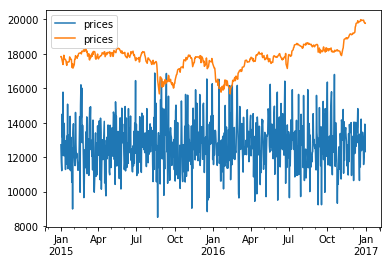

In [25]:
predictions_plot = predictions_df.plot()

fig = y_test.plot(ax=predictions_plot).get_figure()
fig.savefig("randomforest without smoothing.png")

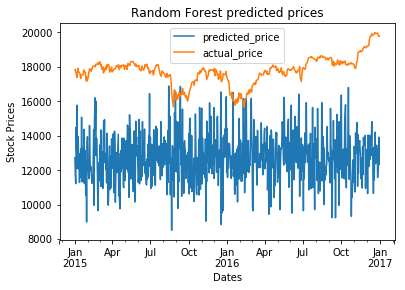

In [26]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest without smoothing.png")

In [27]:
test

,prices,compound,neg,neu,pos
2015-01-01,17828,-0.9299,0.138,0.74,0.122
2015-01-02,17832,-0.9775,0.149,0.759,0.093
2015-01-03,17722,-0.9737,0.131,0.787,0.083
2015-01-04,17612,-0.9971,0.22,0.716,0.064
2015-01-05,17501,-0.9905,0.156,0.767,0.077
2015-01-06,17371,-0.9985,0.171,0.752,0.077
2015-01-07,17584,-0.9965,0.148,0.788,0.064
2015-01-08,17907,-0.9992,0.185,0.734,0.08
2015-01-09,17737,-0.9977,0.172,0.741,0.087
2015-01-10,17705,-0.9979,0.198,0.751,0.051


***After taking a look at the graph - increase price by a constant value is preferred as it represents closing price during the test***

In [28]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Reducing one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    #print temp_date
average_last_5_days_test = average_last_5_days_test / total_days
print(average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day from date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print(temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print(average_upcoming_5_days_predicted)
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print(difference_test_predicted_prices)

17679.9
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
13091.163666666665
4588.736333333336


In [29]:
predictions_df

,prices
2015-01-01,12713.440000
2015-01-02,11718.196667
2015-01-03,11209.000000
2015-01-04,14492.700000
2015-01-05,13138.750000
2015-01-06,15767.600000
2015-01-07,12082.900000
2015-01-08,13754.900000
2015-01-09,13955.650000
2015-01-10,12078.500000


In [30]:
# Adding 3967 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

,prices
2015-01-01,17302.176333
2015-01-02,16306.933000
2015-01-03,15797.736333
2015-01-04,19081.436333
2015-01-05,17727.486333
2015-01-06,20356.336333
2015-01-07,16671.636333
2015-01-08,18343.636333
2015-01-09,18544.386333
2015-01-10,16667.236333


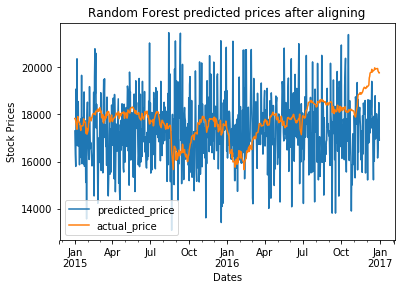

In [31]:
ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("random forest with aligning.png")

***Smoothing the time series data***

***Applying EWMA pandas to smooth the stock prices***

In [32]:
predictions_df

,prices
2015-01-01,17302.176333
2015-01-02,16306.933000
2015-01-03,15797.736333
2015-01-04,19081.436333
2015-01-05,17727.486333
2015-01-06,20356.336333
2015-01-07,16671.636333
2015-01-08,18343.636333
2015-01-09,18544.386333
2015-01-10,16667.236333


In [33]:
predictions_df['ewma'] = (predictions_df["prices"]).ewm(span=60).mean()

In [34]:
predictions_df

,prices,ewma
2015-01-01,17302.176333,17302.176333
2015-01-02,16306.933000,16796.260972
2015-01-03,15797.736333,16452.264103
2015-01-04,19081.436333,17142.780791
2015-01-05,17727.486333,17267.645678
2015-01-06,20356.336333,17826.262636
2015-01-07,16671.636333,17644.371286
2015-01-08,18343.636333,17742.310824
2015-01-09,18544.386333,17843.766527
2015-01-10,16667.236333,17707.695940


In [35]:
predictions_df['actual_value'] = test['prices']
predictions_df['actual_value_ewma'] = (predictions_df["actual_value"]).ewm(span=60).mean()

In [36]:
predictions_df

,prices,ewma,actual_value,actual_value_ewma
2015-01-01,17302.176333,17302.176333,17828,17828.000000
2015-01-02,16306.933000,16796.260972,17832,17830.033333
2015-01-03,15797.736333,16452.264103,17722,17792.815295
2015-01-04,19081.436333,17142.780791,17612,17745.326592
2015-01-05,17727.486333,17267.645678,17501,17693.150223
2015-01-06,20356.336333,17826.262636,17371,17634.886512
2015-01-07,16671.636333,17644.371286,17584,17626.870225
2015-01-08,18343.636333,17742.310824,17907,17666.105392
2015-01-09,18544.386333,17843.766527,17737,17675.072954
2015-01-10,16667.236333,17707.695940,17705,17678.534141


In [37]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

In [38]:
predictions_df

,predicted_price,average_predicted_price,actual_price,average_actual_price
2015-01-01,17302.176333,17302.176333,17828,17828.000000
2015-01-02,16306.933000,16796.260972,17832,17830.033333
2015-01-03,15797.736333,16452.264103,17722,17792.815295
2015-01-04,19081.436333,17142.780791,17612,17745.326592
2015-01-05,17727.486333,17267.645678,17501,17693.150223
2015-01-06,20356.336333,17826.262636,17371,17634.886512
2015-01-07,16671.636333,17644.371286,17584,17626.870225
2015-01-08,18343.636333,17742.310824,17907,17666.105392
2015-01-09,18544.386333,17843.766527,17737,17675.072954
2015-01-10,16667.236333,17707.695940,17705,17678.534141


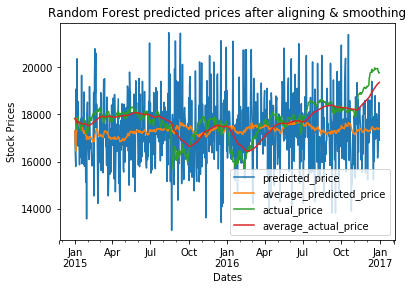

In [39]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing.png")

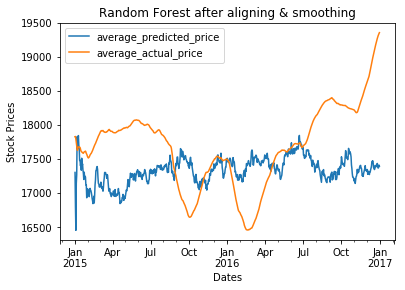

In [40]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("random forest after smoothing 2.png")

***Logistic Regression***

In [41]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[array([17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851, 17148,
       17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851,
       17851, 17851, 17851, 17851, 17148, 17851, 17851, 17851, 17851,
       17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851,
       17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851,
       17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851, 17851,
       17851, 17851, 17851, 16516, 17851, 17851, 17851], dtype=int64)]


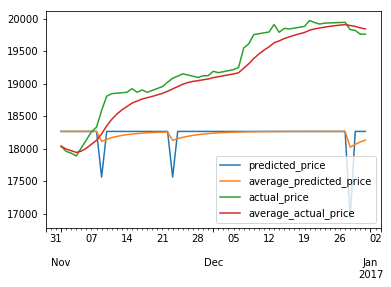

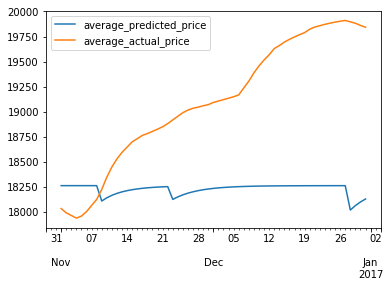

In [42]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta


years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
 # Calculating the sentiment score
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

# Generating models
lr = LogisticRegression()
lr.fit(numpy_df_train, train['prices'])



prediction = lr.predict(numpy_df_test)
prediction_list.append(prediction)
#print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
idx = pd.date_range(test_start_date, test_end_date)
#print year
predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])

difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
# Adding offset to all the advpredictions_df price values
predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
predictions_df_list

# Smoothing the plot

predictions_df_list['ewma'] = (predictions_df_list["prices"]).ewm(span=10).mean()
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] = (predictions_df_list["actual_value"]).ewm(span=10).mean()

# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()
print(prediction_list)

In [43]:
lr.coef_[0]

array([ 0.8107473 , -0.30152865, -1.85831103, -0.25810723])

***Random Forest***

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykerne

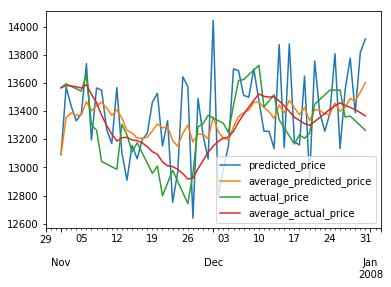

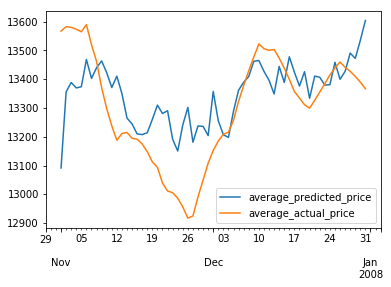

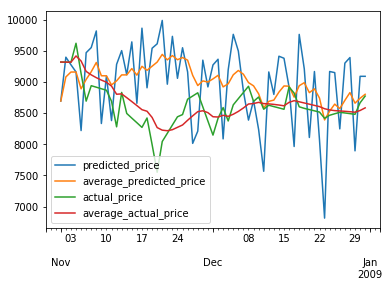

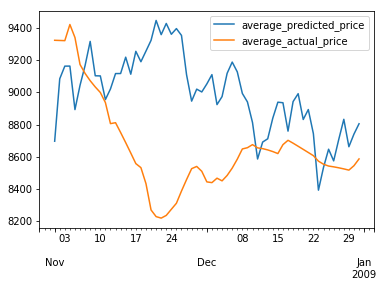

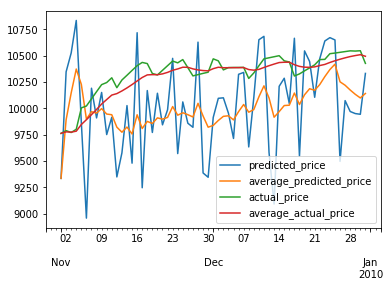

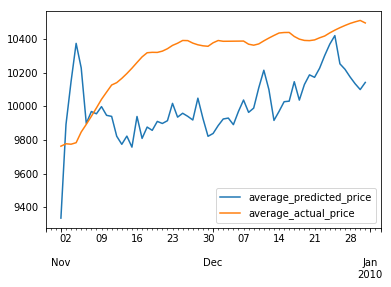

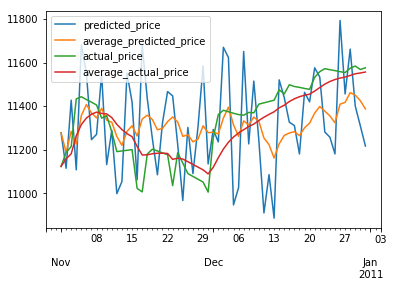

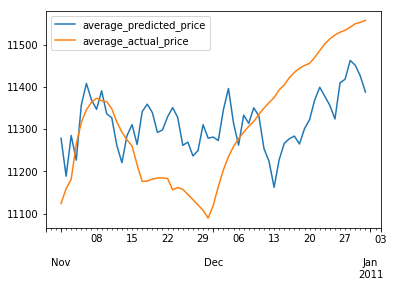

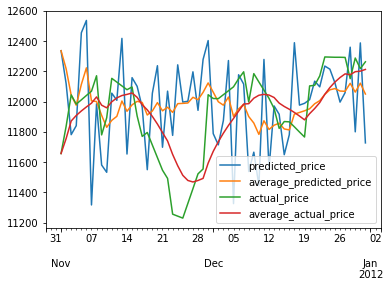

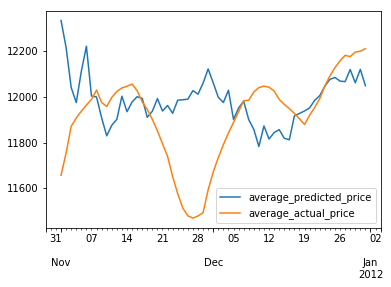

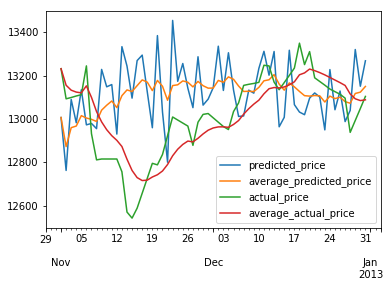

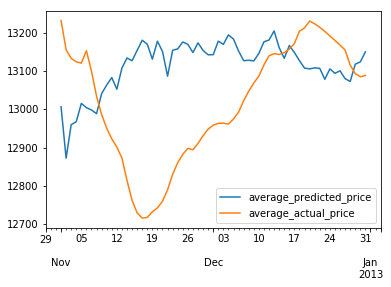

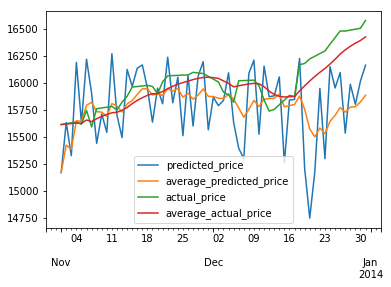

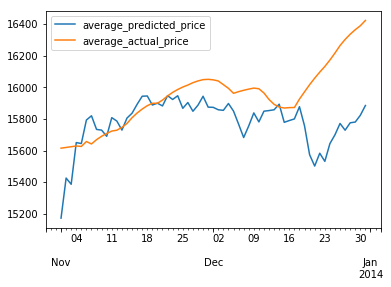

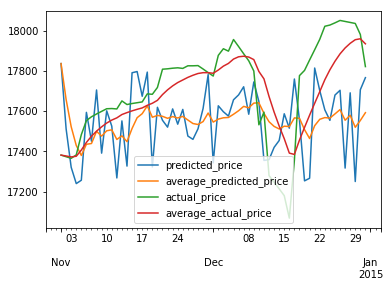

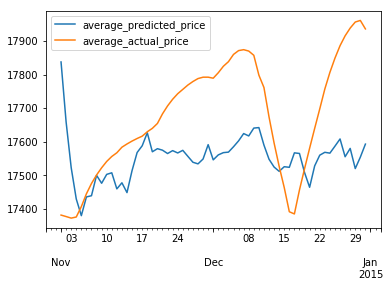

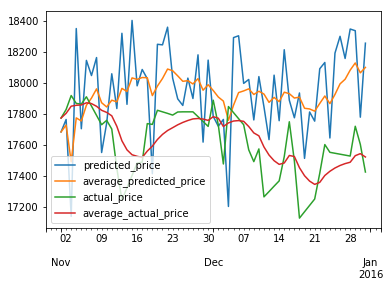

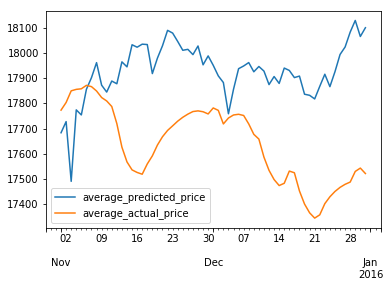

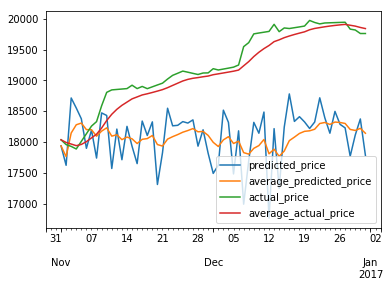

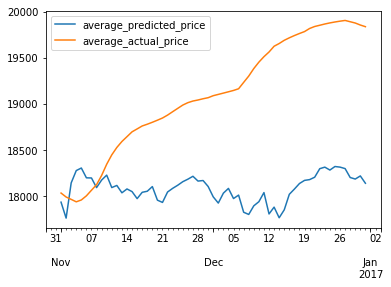

In [44]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor()
    rf.fit(numpy_df_train, train['prices'])
    #print rf
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = (predictions_df_list["prices"]).ewm(span=10).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = (predictions_df_list["actual_value"]).ewm(span=10).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

***MLP Classifier***

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


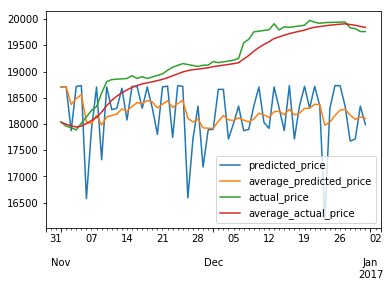

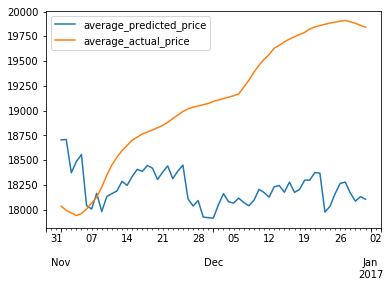

C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\gvsva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


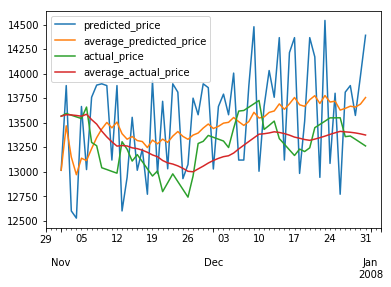

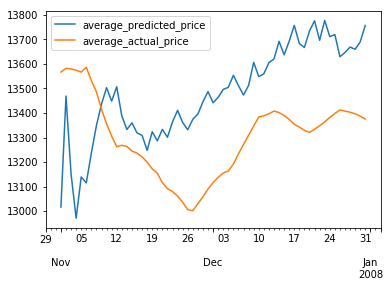

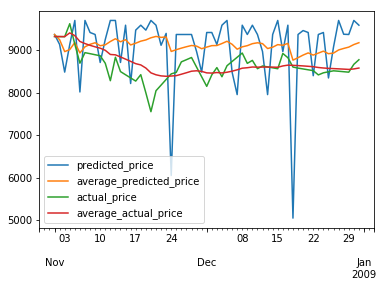

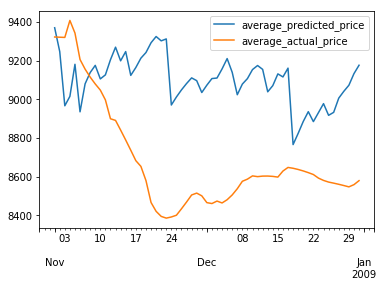

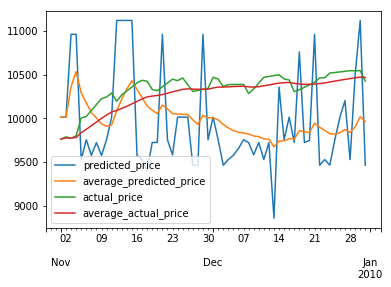

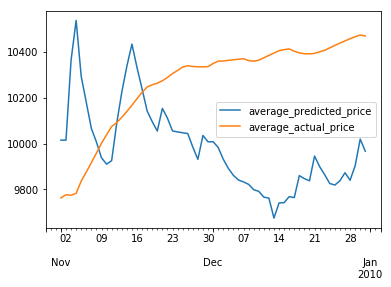

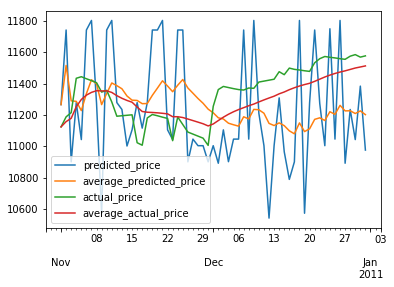

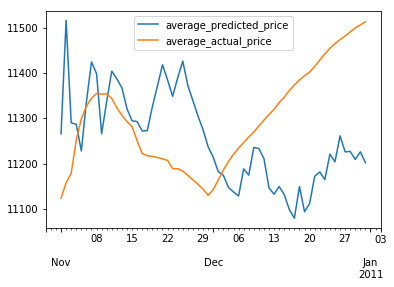

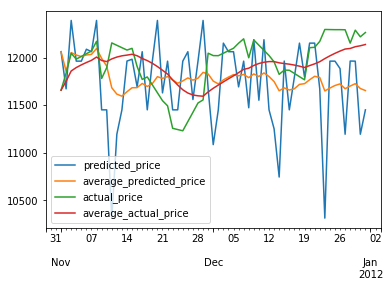

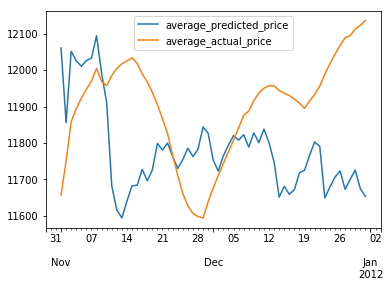

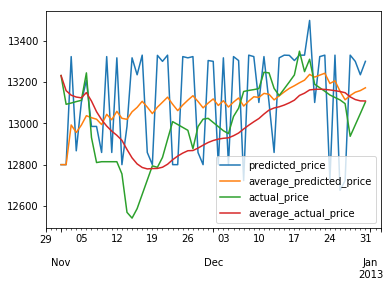

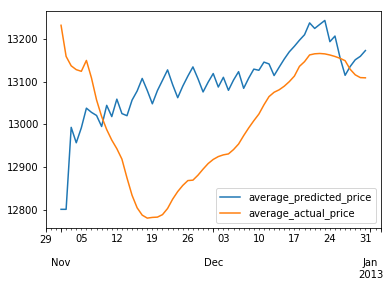

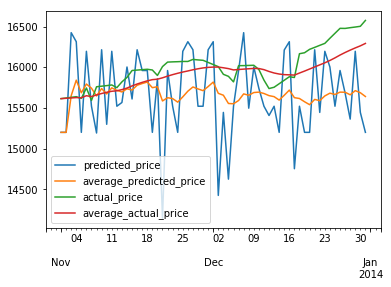

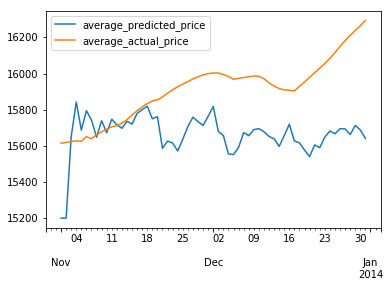

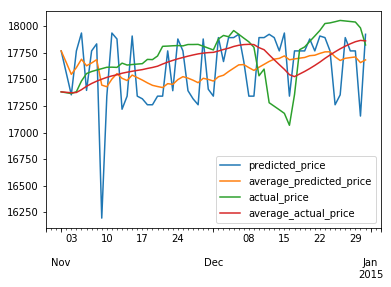

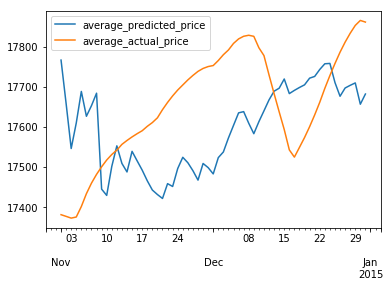

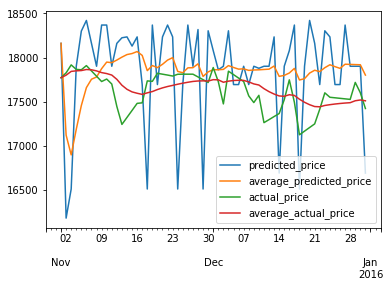

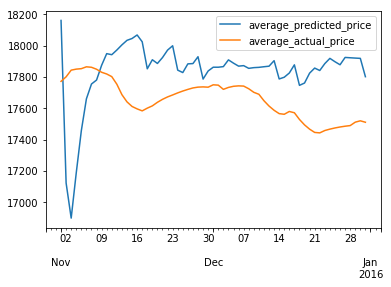

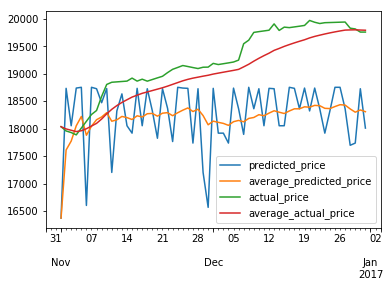

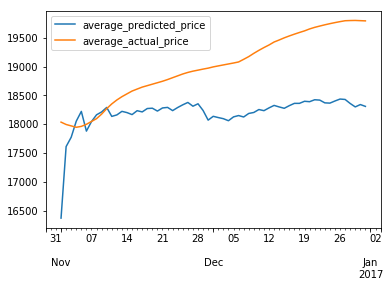

In [50]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.ix[train_start_date : train_end_date]
    test = df.ix[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([df.loc[date, 'compound'],df.loc[date, 'neg'],df.loc[date, 'neu'],df.loc[date, 'pos']])
        #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    #print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date
    idx = pd.date_range(test_start_date, test_end_date)
    #print year
    predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    # Adding offset to all the advpredictions_df price values
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices
    predictions_df_list

    # Smoothing the plot
    predictions_df_list['ewma'] = (predictions_df_list["prices"]).ewm(span=20).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = (predictions_df_list["actual_value"]).ewm(span=20).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

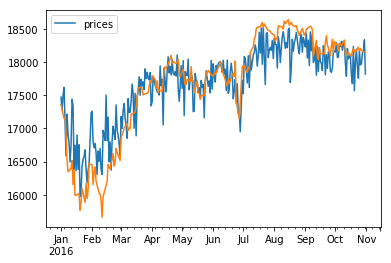

In [53]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()